In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [2]:
# obtain the exchage rate data from AKShare, which is an elegant and simple financial data interface library for Python
# using the API below, to access history trading data from the following website
# http://biz.finance.sina.com.cn/forex/forex.php?startdate=2012-01-01&enddate=2021-06-14&money_code=EUR&type=0
exchange_rate_orign_df = ak.currency_boc_sina(symbol="加拿大元", start_date="20190101", end_date="20231115")

In [3]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates = exchange_rate_orign_df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )

In [4]:
exchange_rates.set_index(exchange_rates['date'], inplace=True)
exchange_rates

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
date,,,
2019-01-01,2019-01-01,505.91,502.21
2019-01-02,2019-01-02,505.35,501.65
2019-01-03,2019-01-03,510.20,506.46
2019-01-04,2019-01-04,511.09,507.35
2019-01-07,2019-01-07,515.00,511.23
...,...,...,...
2023-11-09,2023-11-09,531.69,528.15
2023-11-10,2023-11-10,528.62,525.10
2023-11-13,2023-11-13,530.17,526.64


In [5]:
selling_rates = exchange_rates['bank_selling_exchange_rate']
selling_rates.index = pd.to_datetime(selling_rates.index)


In [6]:
# set frequecy to month, convert the daily period to monthly(start of each month)
# 'BMS' means start of the month (down-sampling) and only include forex trading days
selling_rates.asfreq('BMS')

date
2019-01-01    505.91
2019-02-01    513.42
2019-03-01    510.96
2019-04-01    504.86
2019-05-01    504.28
2019-06-03    514.75
2019-07-01    524.13
2019-08-01    524.86
2019-09-02    540.87
2019-10-01    542.43
2019-11-01    537.31
2019-12-02    531.59
2020-01-01    538.54
2020-02-03    532.32
2020-03-02    523.11
2020-04-01    502.11
2020-05-01    505.63
2020-06-01    525.17
2020-07-01    523.01
2020-08-03    522.94
2020-09-01    525.59
2020-10-01    512.53
2020-11-02    506.84
2020-12-01    509.04
2021-01-01    514.93
2021-02-01    507.10
2021-03-01    512.66
2021-04-01    524.70
2021-05-03    529.18
2021-06-01    533.12
2021-07-01    522.73
2021-08-02    519.32
2021-09-01    513.85
2021-10-01    510.75
2021-11-01    519.79
2021-12-01    502.20
2022-01-03    500.81
2022-02-01    502.55
2022-03-01    499.63
2022-04-01    510.75
2022-05-02    514.33
2022-06-01    530.07
2022-07-01    521.28
2022-08-01    529.91
2022-09-01    526.34
2022-10-03    524.04
2022-11-01    536.07
2022-12-

In [7]:
# resample monthly and take average value (down-sample, record the mean value on the start of each month)
selling_rates.resample(rule='BMS').mean()

date
2019-01-01    511.940870
2019-02-01    512.236500
2019-03-01    504.343333
2019-04-01    504.027143
2019-05-01    511.382609
2019-06-03    521.363500
2019-07-01    527.004783
2019-08-01    534.238182
2019-09-02    539.658095
2019-10-01    540.120000
2019-11-01    532.613333
2019-12-02    534.525455
2020-01-01    531.919130
2020-02-03    529.054500
2020-03-02    505.886364
2020-04-01    505.375000
2020-05-01    510.850952
2020-06-01    524.838636
2020-07-01    521.110435
2020-08-03    525.713810
2020-09-01    517.240000
2020-10-01    511.185455
2020-11-02    507.500952
2020-12-01    512.528261
2021-01-01    510.593333
2021-02-01    510.923000
2021-03-01    519.730000
2021-04-01    523.735455
2021-05-03    532.385714
2021-06-01    527.862273
2021-07-01    519.128636
2021-08-02    516.105455
2021-09-01    511.790455
2021-10-01    518.169048
2021-11-01    510.366364
2021-12-01    499.796522
2022-01-03    505.548095
2022-02-01    500.843000
2022-03-01    503.375652
2022-04-01    511.26

In [8]:
mpl.rcParams.update({
    'figure.figsize': [15, 8]
})

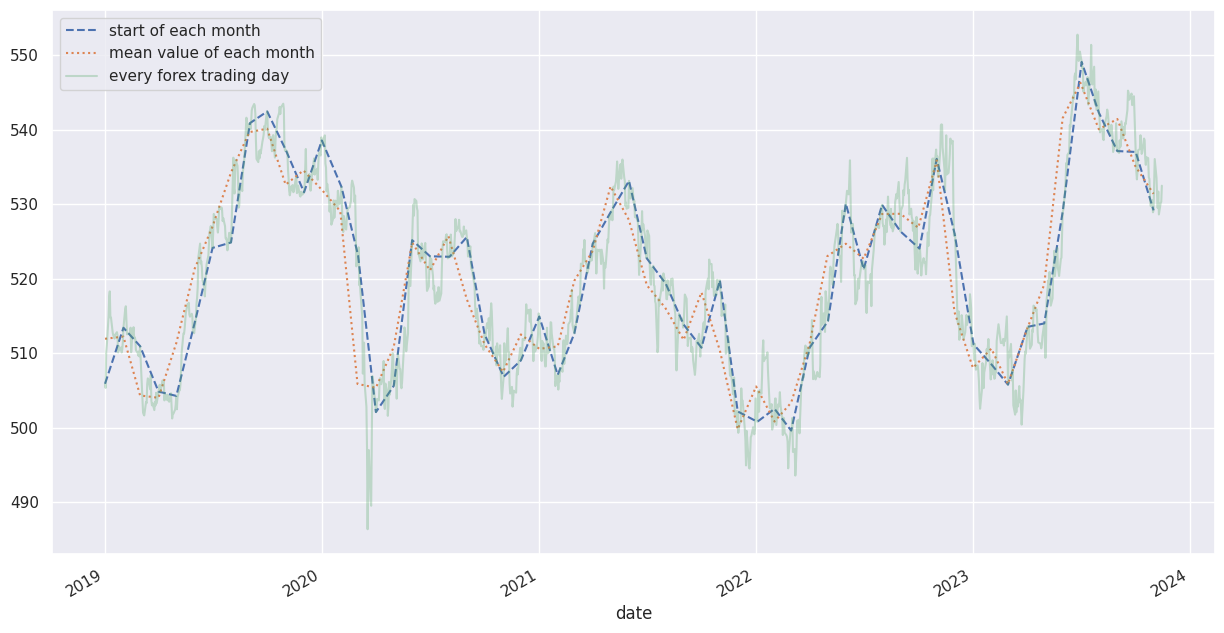

In [9]:
selling_rates.asfreq('BMS').plot(style='--', label='start of each month')
selling_rates.resample('MS').mean().plot(style=':', label='mean value of each month')
selling_rates.plot(alpha=0.3, style='-', label = 'every forex trading day')
plt.legend()

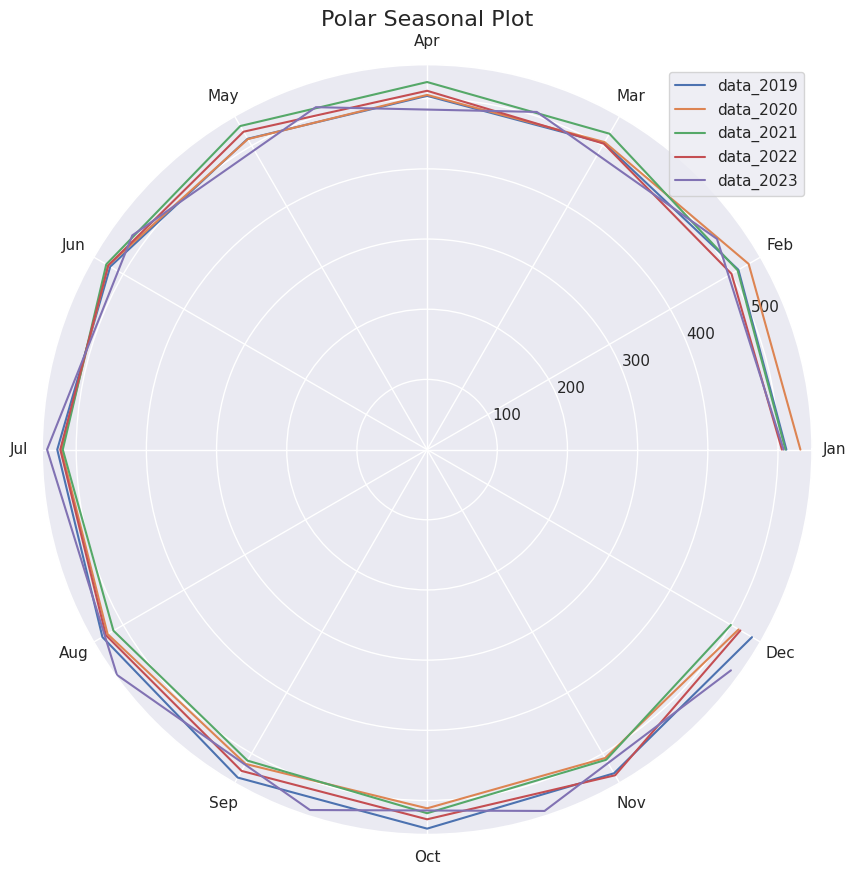

In [10]:
# Create an example time series data

data = selling_rates.resample('MS').mean()
# Convert dates to numerical format
data_2019 = data['2019-01-01':'2019-12-01']
data_2020 = data['2020-01-01':'2020-12-01']
data_2021 = data['2021-01-01':'2021-12-01']
data_2022 = data['2022-01-01':'2022-12-01']
data_2023 = data['2023-01-01':'2023-10-01']

# Plot the original time series
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

# Plot the seasonal component in polar coordinates
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)

ax.plot(theta, data_2019, label='data_2019')
ax.plot(theta, data_2020, label='data_2020')
ax.plot(theta, data_2021, label='data_2021')
ax.plot(theta, data_2022, label='data_2022')

theta_2023 = np.linspace(0, 2 * np.pi, len(data_2023), endpoint=False)
ax.plot(theta_2023, data_2023, label='data_2023')


# Set polar axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
ax.set_xticks(month_angles)
ax.set_xticklabels(months)

# Add a title
plt.title('Polar Seasonal Plot', fontsize=16)

# Show the plot
plt.legend()
plt.show()

In [11]:
selling_rates.asfreq('BM')

date
2019-01-31    511.57
2019-02-28    509.58
2019-03-29    503.31
2019-04-30    503.08
2019-05-31    512.69
2019-06-28    527.06
2019-07-31    526.05
2019-08-30    540.63
2019-09-30    542.18
2019-10-31    537.14
2019-11-29    531.28
2019-12-31    538.95
2020-01-31    530.02
2020-02-28    521.66
2020-03-31    503.17
2020-04-30    509.94
2020-05-29    519.02
2020-06-30    521.44
2020-07-31    522.73
2020-08-31    526.48
2020-09-30    511.37
2020-10-30    503.88
2020-11-30    510.73
2020-12-31    515.34
2021-01-29    506.25
2021-02-26    513.77
2021-03-31    522.91
2021-04-30    527.93
2021-05-31    529.52
2021-06-30    522.89
2021-07-30    520.27
2021-08-31    513.44
2021-09-30    511.63
2021-10-29    518.60
2021-11-30    500.19
2021-12-31    503.94
2022-01-31    500.93
2022-02-28    499.66
2022-03-31    509.92
2022-04-29    517.51
2022-05-31    529.38
2022-06-30    522.34
2022-07-29    528.60
2022-08-31    529.06
2022-09-30    520.68
2022-10-31    537.32
2022-11-30    525.75
2022-12-

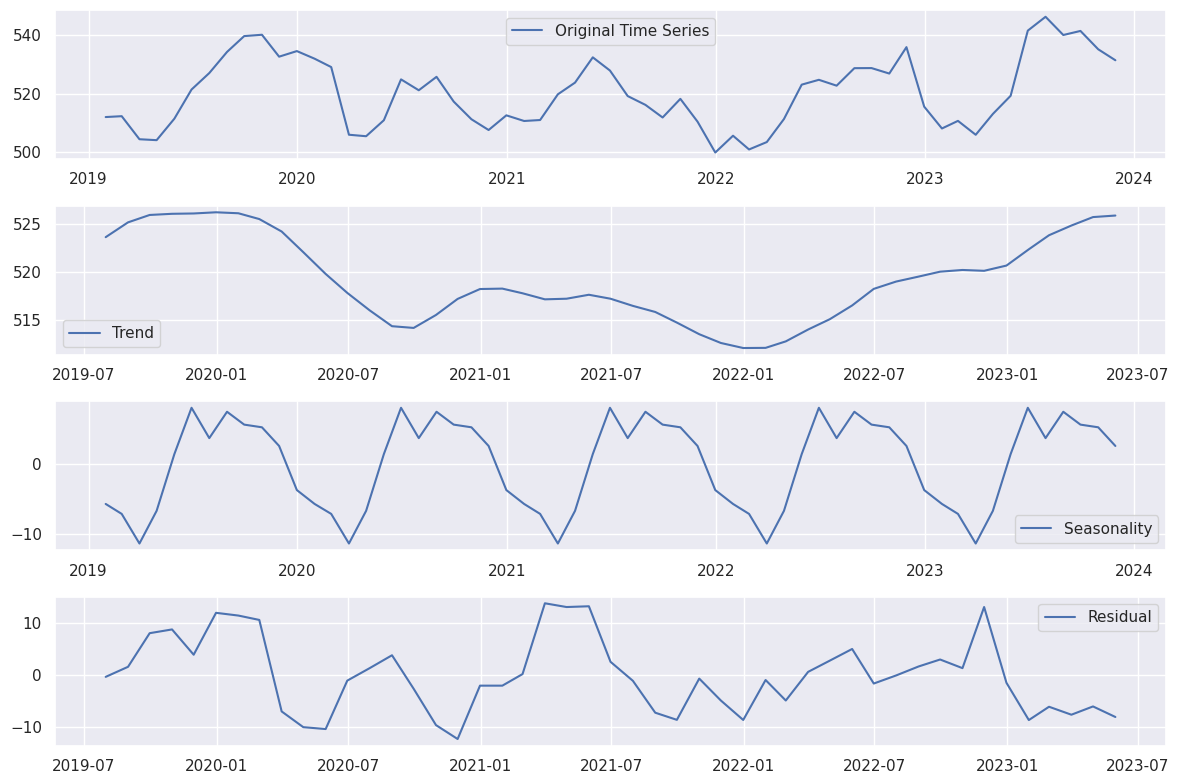

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# load time series data
# ts = selling_rates.asfreq('W', method='backfill')
ts = selling_rates.resample('M').mean()

# Perform seasonal decomposition
result = seasonal_decompose(ts)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series and its components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
result.trend['2019-07-01':'2019-08-01']

date
2019-07-31    523.620244
Freq: M, Name: trend, dtype: float64

In [14]:
ts['2019-07-01':'2019-08-01']

date
2019-07-31    527.004783
Freq: M, Name: bank_selling_exchange_rate, dtype: float64

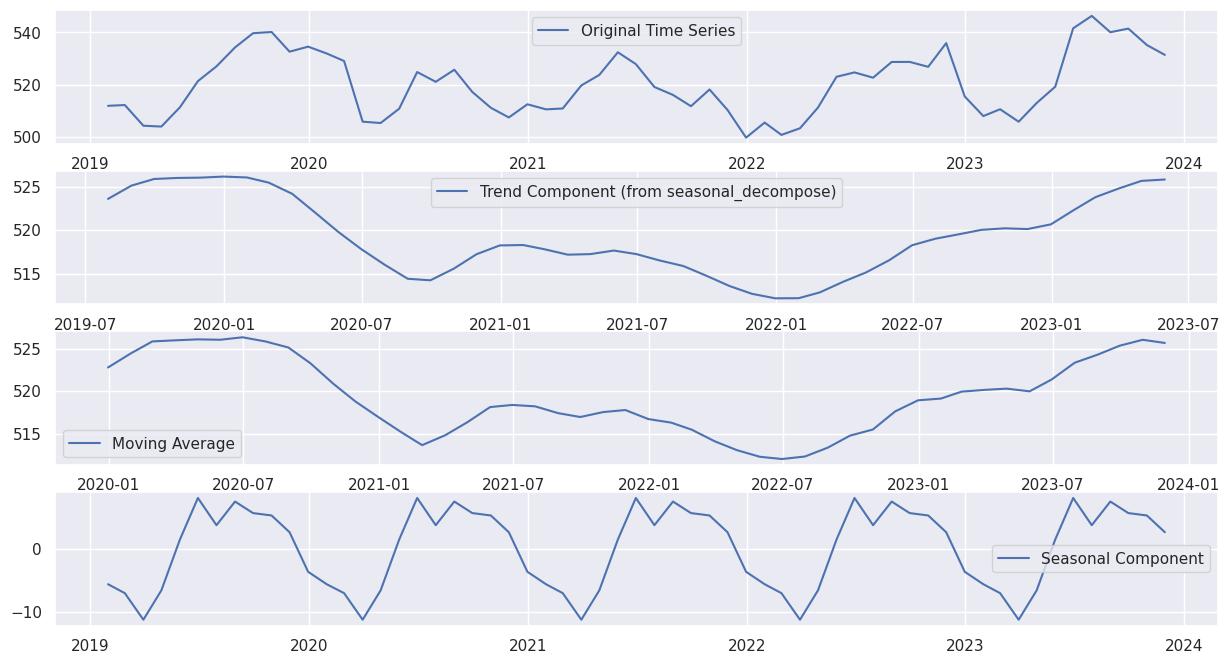

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period=12)

# Original time series
plt.subplot(4, 1, 1)
plt.plot(ts, label='Original Time Series')
plt.legend()

# Trend component from seasonal decomposition
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend Component (from seasonal_decompose)')
plt.legend()

# 12-month moving average
plt.subplot(4, 1, 3)
plt.plot(ts.rolling(window=12).mean(), label='Moving Average')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 4)
plt.plot(result.seasonal, label='Seasonal Component')
plt.legend()

plt.show()


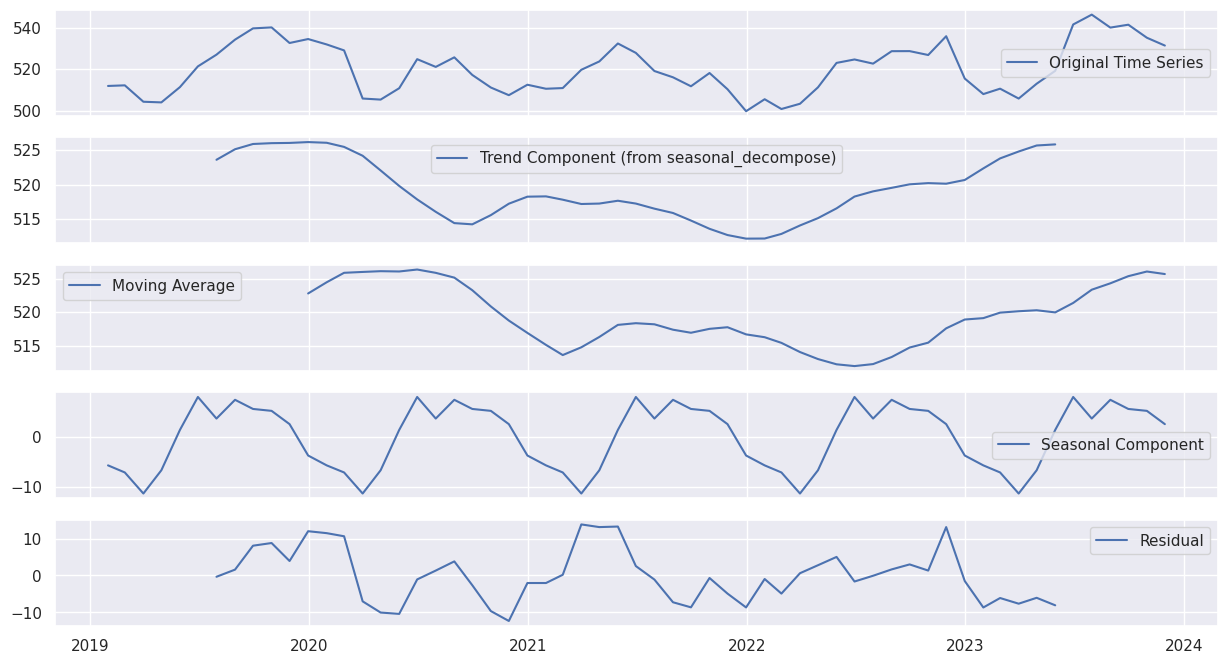

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period=12)

# Plotting
fig, axs = plt.subplots(5, 1, sharex=True)

# Original time series
axs[0].plot(ts, label='Original Time Series')
axs[0].legend()

# Trend component from seasonal decomposition
axs[1].plot(result.trend, label='Trend Component (from seasonal_decompose)')
axs[1].legend()

# 12-month moving average
axs[2].plot(ts.rolling(window=12).mean(), label='Moving Average')
axs[2].legend()

# Seasonal component
axs[3].plot(result.seasonal, label='Seasonal Component')
axs[3].legend()

axs[4].plot(result.resid, label='Residual')
axs[4].legend()
plt.show()


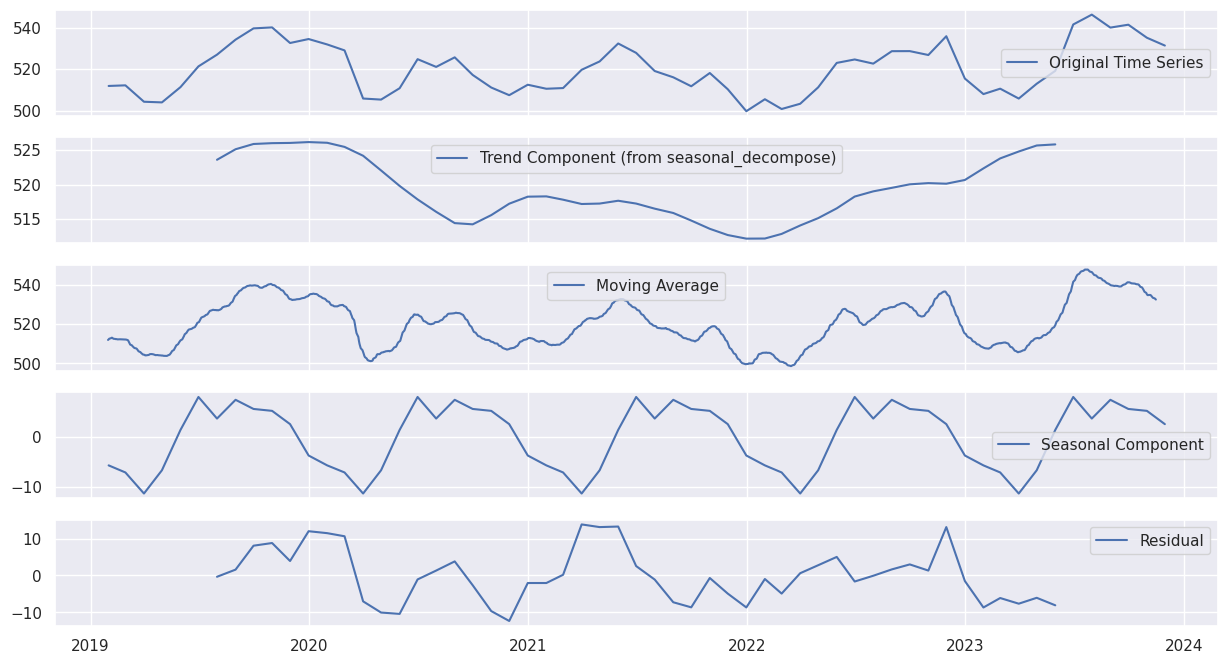

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period=12)

# Plotting
fig, axs = plt.subplots(5, 1, sharex=True)

# Original time series
axs[0].plot(ts, label='Original Time Series')
axs[0].legend()

# Trend component from seasonal decomposition
axs[1].plot(result.trend, label='Trend Component (from seasonal_decompose)')
axs[1].legend()

# 12-month moving average
axs[2].plot(selling_rates.rolling(window=22).mean(), label='Moving Average')
axs[2].legend()

# Seasonal component
axs[3].plot(result.seasonal, label='Seasonal Component')
axs[3].legend()

axs[4].plot(result.resid, label='Residual')
axs[4].legend()
plt.show()


###     Additive Model:
        Suitable when the amplitude of seasonality remains relatively constant.
        Appropriate for time series where the variations around the trend are consistent across different levels.

###     Multiplicative Model:
        Suitable when the amplitude of seasonality is proportional to the level of the time series.
        Often chosen for data with increasing or decreasing trends, where the seasonality grows or shrinks with the trend.

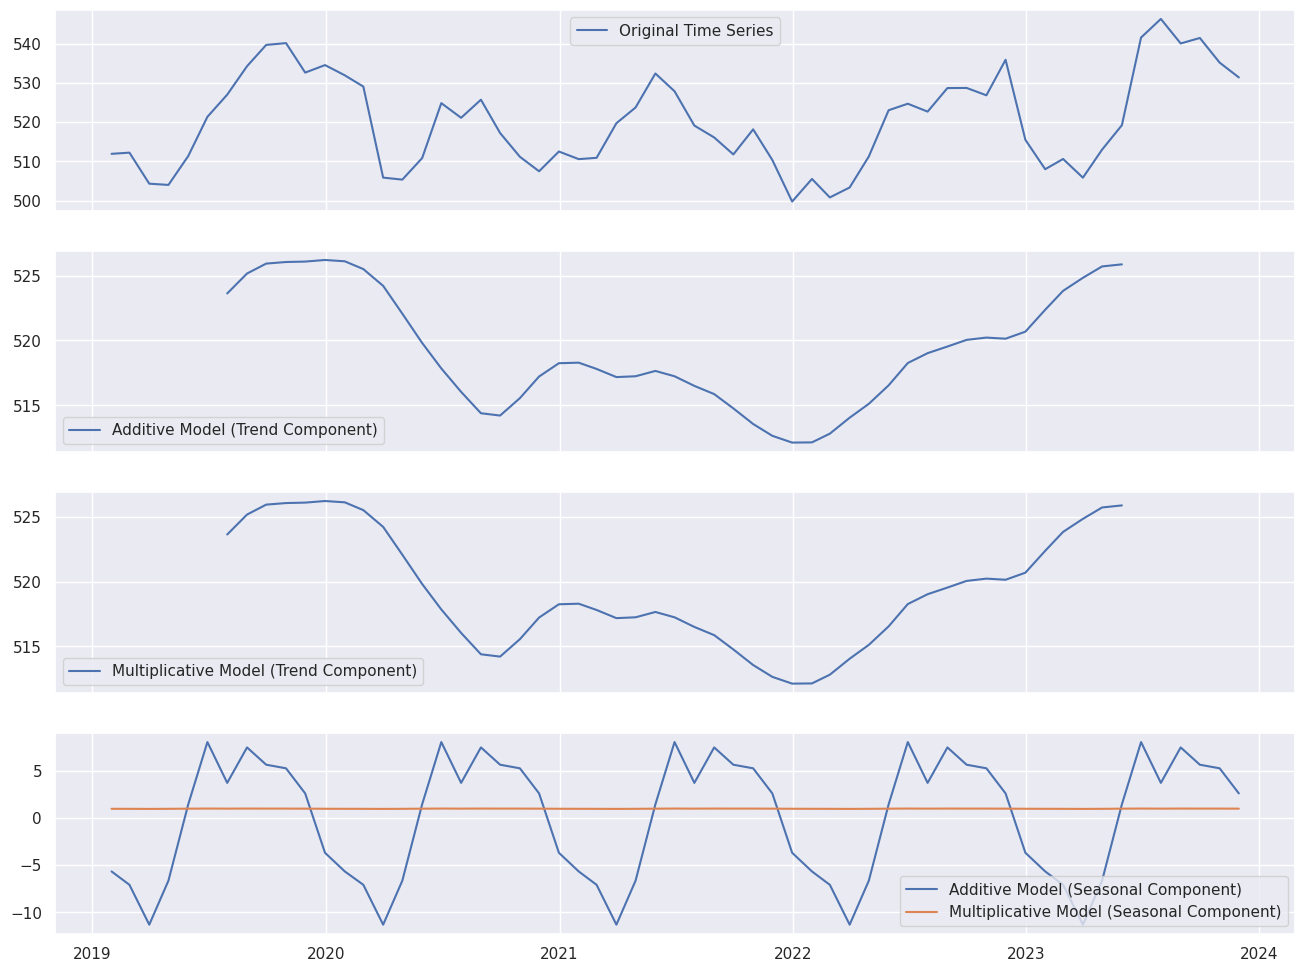

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'time_series_data' is your time series data
result_additive = seasonal_decompose(ts, model='additive', period=12)
result_multiplicative = seasonal_decompose(ts, model='multiplicative', period=12)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# Original time series
axs[0].plot(ts, label='Original Time Series')
axs[0].legend()

# Trend component from additive model
axs[1].plot(result_additive.trend, label='Additive Model (Trend Component)')
axs[1].legend()

# Trend component from multiplicative model
axs[2].plot(result_multiplicative.trend, label='Multiplicative Model (Trend Component)')
axs[2].legend()

# Seasonal component (both models)
axs[3].plot(result_additive.seasonal, label='Additive Model (Seasonal Component)')
axs[3].plot(result_multiplicative.seasonal, label='Multiplicative Model (Seasonal Component)')
axs[3].legend()

plt.show()


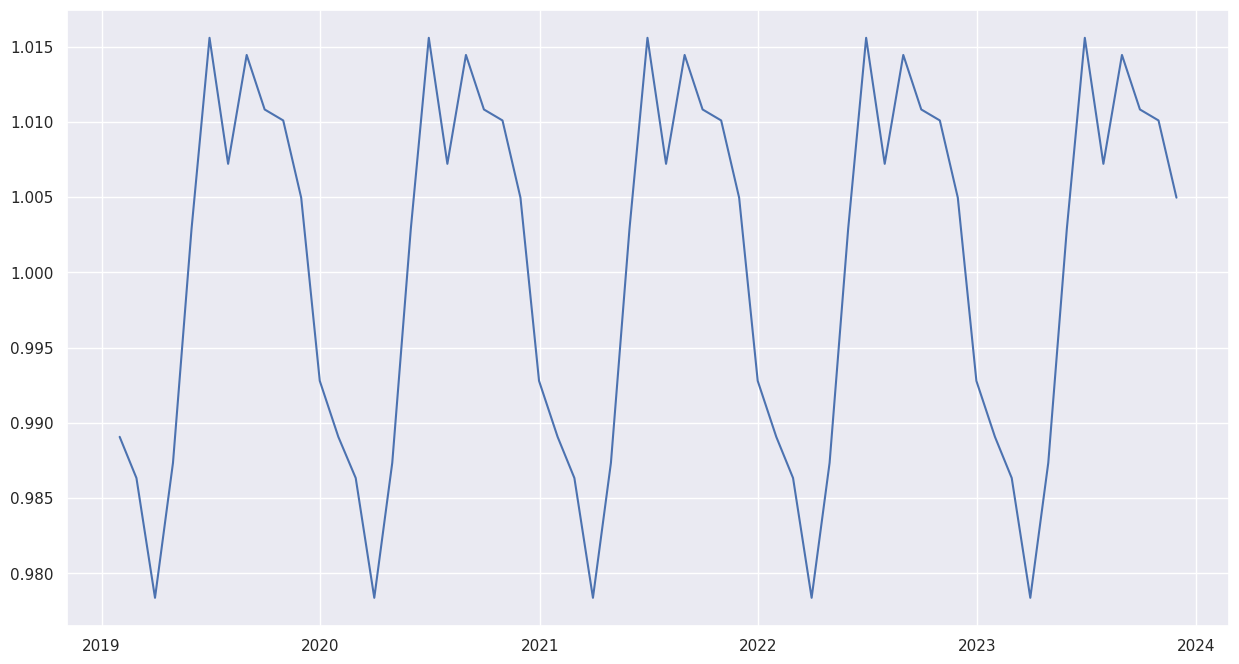

In [24]:
plt.plot(result_multiplicative.seasonal, label='Multiplicative Model (Seasonal Component)')